In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import tifffile as tf

import sys
sys.path.append( "../2PanalysisUtils" )
#sys.path.append("/home/mursel/DriveNYU/2PanalysisUtils")
import plotconfig as pconf
import matread as mread
import funx_mk as mk
import pandas as pd
import seaborn as sns
import math

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path
import matplotlib.colors as mlcolors
import matplotlib.cbook as cbook
from matplotlib import cm
%config InlineBackend.figure_format = 'svg'

IMAGES_PATH = Path() / "ResultImgs"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

In [5]:
fieldname1 = 'SC49W/220523/8odorsglom/SC49W_220523_8odorsglom'
glom_field1 = mk.read_session(fieldname1)

Number of Stimulus Types: 25
Number of Trial per Stimulus: 4
Dimensions of single trial array (# time points by # neuron # Trial): (348, 95, 4)


In [ ]:
df_responses_stat =mk.calc_onset_time(glom_field1['odor_responses'],glom_field1['odor_list'], threshold1 = 5, threshold2 =4.0,window_duration=500)
unique_odor = df_responses_stat['odor_val'].unique()
print(unique_odor )
df_responses_stat[(df_responses_stat['odor_val'] == unique_odor[5]) & (df_responses_stat['response_sign'] == 0)]

['Cin 1.0' 'Cin 5.0' 'Cin50.0' 'Etg 1.0' 'Etg 5.0' 'Etg50.0' 'Evt 1.0'
 'Evt 5.0' 'Evt50.0' 'Pinene 1.0' 'Pinene 5.0' 'Pinene50.0' '2hepn 1.0'
 '2hepn 5.0' '2hepn50.0' '3hepn 1.0' '3hepn 5.0' '3hepn50.0' 'Benz 1.0'
 'Benz 5.0' 'Benz50.0' 'Mvt 1.0' 'Mvt 5.0' 'Mvt50.0' 'Empty 5.0']


,roi_id,odor_val,response_sign,std_baseline,mean_baseline,max_val,mean_odor_resp,std_odor_resp,latencies,latency_rank,max_normalized,mean_normalized,max_amp_rank,mean_amp_rank,latencies_tofirst
5,1,Etg50.0,0,0.012346,0.000482,0.097606,0.035057,0.035633,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,3,Etg50.0,0,0.031231,-0.001056,0.305790,0.048881,0.150687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,6,Etg50.0,0,0.064944,-0.009610,0.165671,-0.134179,0.018911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,9,Etg50.0,0,0.032817,0.003922,0.117309,0.035321,0.070403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,12,Etg50.0,0,0.031432,-0.002658,0.148846,0.042488,0.064022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355,15,Etg50.0,0,0.076829,-0.012055,0.235025,-0.168851,0.034677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
430,18,Etg50.0,0,0.022463,0.001341,0.074231,-0.006123,0.033255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
530,22,Etg50.0,0,0.025865,-0.000278,0.182118,0.079975,0.057398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
580,24,Etg50.0,0,0.016757,-0.008563,0.119285,0.038823,0.043191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605,25,Etg50.0,0,0.027214,0.007848,0.172707,0.069177,0.047973,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Sorted Latencies:  [ 1.          0.77108159  1.          2.25664016  1.          2.47180233
  1.          0.4960401   1.          0.70002228  1.          1.19338847
  1.          0.61440049  1.          0.74045952  1.          1.43577087
  1.          0.5120259   1.          0.28018567  1.          1.15779573
  1.          0.53475856  1.          0.48836725  1.          0.39801543
  1.          0.63466834  1.          0.25854657  1.          0.63935121
  1.          0.36629493  1.          0.51231458  1.          0.81804615
  1.          0.17952347  1.          0.27098378  1.          0.29406552
  0.          0.23248755  0.          0.11968985  0.          0.10942652
  0.          0.09497561  0.          0.07864622  0.          0.07762914
  0.          0.07202752  0.          0.06267309  0.          0.06197925
  0.          0.05610268  0.          0.04907095  0.          0.04440737
  0.          0.04174964  0.          0.04152869  0.          0.04131765
  0.          0.03946596  0.    

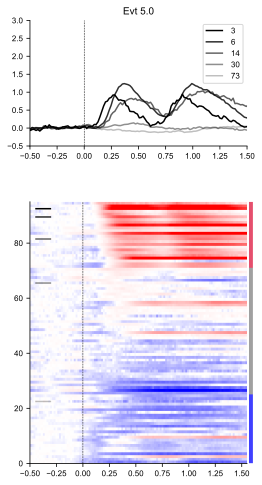

In [ ]:
def plot_odor_response(df_responses_stat, glom_field1, odor_index=8,climit=(-0.5, 3),cell_ids = [1,5]):
    """
    Plot odor response data for a specific odor, including mean response and heatmap.
    
    Parameters:
    - df_responses_stat (pd.DataFrame): DataFrame with response statistics.
    - glom_field1 (dict): Dictionary containing odor response data and metadata.
    - odor_index (int): Index of the odor to analyze (default: 7).
    
    Returns:
    - fig, axes: Matplotlib figure and axes objects.
    """
    # Extract unique odors and filter for the specified odor
    unique_odors = df_responses_stat['odor_val'].unique()
    df_filtered = df_responses_stat[df_responses_stat['odor_val'] == unique_odors[odor_index]]

    # Extract data for sorting and processing
    ncell = glom_field1['ncell']
    latency = df_filtered['latencies'].to_numpy()
    response_sign = df_filtered['response_sign'].to_numpy()
    resp_mean = df_filtered['mean_odor_resp'].to_numpy()
    # Sort indices based on latency rank
    latency[np.isnan(latency)] = 1e3-resp_mean[np.isnan(latency)] 
    latency.astype(int)
    sort_ind = np.argsort(latency)
    print("Sorted Latencies: ", (np.array([response_sign[sort_ind], resp_mean[sort_ind]]).T).flatten())
    response_sign_sorted = response_sign[sort_ind]  # Sort response_sign to match heatmap
    # Compute mean odor responses across trials, sorted by latency
    mean_odor_responses = np.mean(glom_field1['odor_responses'][odor_index][:, sort_ind, :], axis=2)

    # Set up colormap and normalization for heatmap
    norm_cmap = mlcolors.TwoSlopeNorm(vmin=climit[0], vcenter=0, vmax=climit[1])

    sign_cmap = mlcolors.ListedColormap(['blue', 'grey', 'crimson'])  # -1: blue, 0: white, 1: red
    sign_norm = mlcolors.BoundaryNorm([-1.5, -0.5, 0.5, 1.5], sign_cmap.N)  # 
    
    # Create figure and subplots
    fig = plt.figure(figsize=(4, 8), dpi=200)
    grid = plt.GridSpec(10, 11, figure=fig, wspace=0.1, hspace=0.3, width_ratios=[1]*10 + [0.2])
    # Time axis for plotting
    taxes = np.linspace(-2, 4, num=mean_odor_responses.shape[0])

    # Define cells to plot and corresponding alpha values
    alpha_values = np.linspace(1, 0.25, len(cell_ids))  # Alpha values for transparency
    axs1 = fig.add_subplot(grid[0:3, 0:10])
    # Plot mean response for specified cells in the first subplot
    for cell_id, alpha in zip(cell_ids, alpha_values):
        axs1.plot(taxes, mean_odor_responses[:, cell_id], color='black', alpha=alpha, label=f' {cell_id}')
    axs1.axvline(0, color='black', lw=0.5, ls='--')

    axs1.set_xlim(-0.5, 1.5)
    axs1.set_ylim(climit)
    axs1.legend()  # Add legend to distinguish cells

    axs2 = fig.add_subplot(grid[4:10, 0:10])
    # Plot heatmap of sorted responses in the second subplot
    axs2.pcolorfast(taxes, ncell-np.arange(mean_odor_responses.shape[1] + 1), 
                       (mean_odor_responses.T), cmap='bwr', norm=norm_cmap)
    axs1.set_title(glom_field1['odor_list'][odor_index])
    for cell_id,alpha in zip(cell_ids, alpha_values):
        axs2.hlines(y=ncell-cell_id + 0.5, xmin=-0.45, xmax=-0.3, color='black', lw=1.5,alpha=alpha)
    axs2.axvline(0, color='black', lw=0.5, ls='--')
    axs2.set_xlim(-0.5, 1.55)
    axs3 = fig.add_subplot(grid[4:10, 10])
    sign_data = response_sign_sorted[::-1, np.newaxis]  # Reverse to match flipud
    axs3.pcolorfast([1.5, 1.55], np.arange(mean_odor_responses.shape[1] + 1), 
                       sign_data, cmap=sign_cmap, norm=sign_norm,alpha=0.75)
    axs3.axis("off")
    # Remove spines for cleaner appearance
    sns.despine()
    axes = [axs1, axs2, axs3]
    return fig, axes



In [262]:
fieldname2 = 'SC46/220617/8odors/SC46_220617_8odors'
MC_field1 = mk.read_session(fieldname2)

Number of Stimulus Types: 17
Number of Trial per Stimulus: 10
Dimensions of single trial array (# time points by # neuron # Trial): (180, 130, 10)


In [328]:
df_responses_stat_MC =mk.calc_onset_time(MC_field1['odor_responses'],MC_field1['odor_list'], threshold1 = 3.0, threshold2 = 3.0,window_duration=500)
unique_odor2 = df_responses_stat_MC['odor_val'].unique()
print(unique_odor2 )
#df_responses_stat_MC[(df_responses_stat_MC['odor_val'] == unique_odor2[4]) & (df_responses_stat_MC['response_sign'] == -0)]

['Cin 4.9' 'Cin49.0' 'Etg 4.9' 'Etg49.0' 'Evt 4.9' 'Evt49.0' 'Pinene 4.9'
 'Pinene49.0' '2hepn 4.9' '2hepn49.0' '3hepn 4.9' '3hepn49.0' 'Benz 4.9'
 'Benz49.0' 'Mvt 4.9' 'Mvt49.0' 'Empty 9.0']


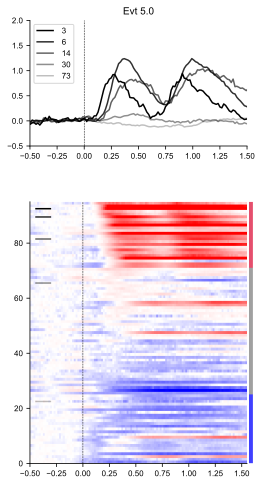

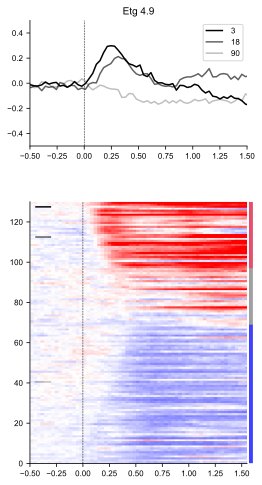

In [351]:
fig, axes = plot_odor_response(df_responses_stat, glom_field1, odor_index=7,cell_ids = [3,6,14,30,73],climit=(-0.5,2))
pconf.save_fig("SC49W_Fig1B",tight_layout=False, Imagespath = IMAGES_PATH)
fig, axes = plot_odor_response(df_responses_stat_MC, MC_field1, odor_index=2,climit=(-0.5,0.5),cell_ids= [3,18,90])
pconf.save_fig("SC49W_Fig1C",tight_layout=False, Imagespath = IMAGES_PATH)
